In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read in the data
data = pd.read_csv("Market Data EURUSD MACD .csv")

In [ ]:
#Forecast horizon
look_ahead = 20

In [ ]:
#How many times does the MACD Fall and price rises?
data.loc[(data["MACD Main"] < data["MACD Main"].shift(-look_ahead)) & (data["Close"] > data["Close"].shift(-look_ahead))].shape[0]/data.loc[(data["MACD Main"] < data["MACD Main"].shift(-look_ahead))].shape[0]

0.18570309203785185

In [ ]:
#Let's add labels
data["Bull Bear"] = np.where(data["Close"] < data["Close"].shift(look_ahead),0,1)
data["MACD Bull"] = np.where(data["MACD Main"] < data["MACD Main"].shift(look_ahead),0,1)

data = data.loc[20:,:]

data

Time     Open     High      Low    Close  MACD Main  \
20     2024.07.01 08:42:00  1.07596  1.07605  1.07596  1.07604   0.000103   
21     2024.07.01 08:43:00  1.07604  1.07607  1.07599  1.07602   0.000105   
22     2024.07.01 08:44:00  1.07603  1.07614  1.07603  1.07614   0.000114   
23     2024.07.01 08:45:00  1.07614  1.07615  1.07609  1.07614   0.000120   
24     2024.07.01 08:46:00  1.07614  1.07620  1.07609  1.07610   0.000120   
...                    ...      ...      ...      ...      ...        ...   
99995  2024.10.04 23:52:00  1.09747  1.09751  1.09745  1.09749  -0.000030   
99996  2024.10.04 23:53:00  1.09749  1.09753  1.09746  1.09751  -0.000019   
99997  2024.10.04 23:54:00  1.09750  1.09759  1.09747  1.09756  -0.000007   
99998  2024.10.04 23:55:00  1.09756  1.09759  1.09746  1.09747  -0.000004   
99999  2024.10.04 23:56:00  1.09747  1.09749  1.09744  1.09745  -0.000004   

       MACD Signal  Bull Bear  MACD Bull  
20        0.000089          1          1  
21        0.000093          1          1  
22        0.000097          1          1  
23        0.000101          1          1  
24        0.000105          1          1  
...            ...        ...        ...  
99995    -0.000062          0          0  
99996    -0.000055          1          1  
99997    -0.000047          1          1  
99998    -0.000039          1          1  
99999    -0.000032          1          1  

[99980 rows x 9 columns]

In [ ]:
data["MACD Target"] = data["MACD Main"].shift(-look_ahead)
data["Price Target"] = data["Close"].shift(-look_ahead)

data["MACD Binary Target"] = np.where(data["MACD Main"] < data["MACD Target"],1,0)
data["Price Binary Target"] = np.where(data["Close"] < data["Price Target"],1,0)

data = data.iloc[:-20,:]
data

Time     Open     High      Low    Close  MACD Main  \
20     2024.07.01 08:42:00  1.07596  1.07605  1.07596  1.07604   0.000103   
21     2024.07.01 08:43:00  1.07604  1.07607  1.07599  1.07602   0.000105   
22     2024.07.01 08:44:00  1.07603  1.07614  1.07603  1.07614   0.000114   
23     2024.07.01 08:45:00  1.07614  1.07615  1.07609  1.07614   0.000120   
24     2024.07.01 08:46:00  1.07614  1.07620  1.07609  1.07610   0.000120   
...                    ...      ...      ...      ...      ...        ...   
99975  2024.10.04 23:32:00  1.09748  1.09753  1.09747  1.09752  -0.000026   
99976  2024.10.04 23:33:00  1.09752  1.09752  1.09741  1.09741  -0.000039   
99977  2024.10.04 23:34:00  1.09741  1.09743  1.09738  1.09741  -0.000049   
99978  2024.10.04 23:35:00  1.09741  1.09743  1.09740  1.09743  -0.000054   
99979  2024.10.04 23:36:00  1.09743  1.09744  1.09740  1.09740  -0.000060   

        MACD Signal  Bull Bear  MACD Bull  MACD Target  Price Target  \
20     8.921551e-05          1          1     0.000040       1.07645   
21     9.277302e-05          1          1     0.000079       1.07650   
22     9.680753e-05          1          1     0.000123       1.07668   
23     1.011698e-04          1          1     0.000150       1.07661   
24     1.051186e-04          1          1     0.000178       1.07671   
...             ...        ...        ...          ...           ...   
99975 -6.308749e-07          0          0    -0.000030       1.09749   
99976 -6.123479e-06          0          0    -0.000019       1.09751   
99977 -1.292745e-05          0          0    -0.000007       1.09756   
99978 -2.014950e-05          0          0    -0.000004       1.09747   
99979 -2.743952e-05          0          0    -0.000004       1.09745   

       MACD Binary Target  Price Binary Target  
20                      0                    1  
21                      0                    1  
22                      1                    1  
23                      1                    1  
24                      1                    1  
...                   ...                  ...  
99975                   0                    0  
99976                   1                    1  
99977                   1                    1  
99978                   1                    1  
99979                   1                    1  

[99960 rows x 13 columns]

<Axes: xlabel='MACD Main', ylabel='MACD Signal'>

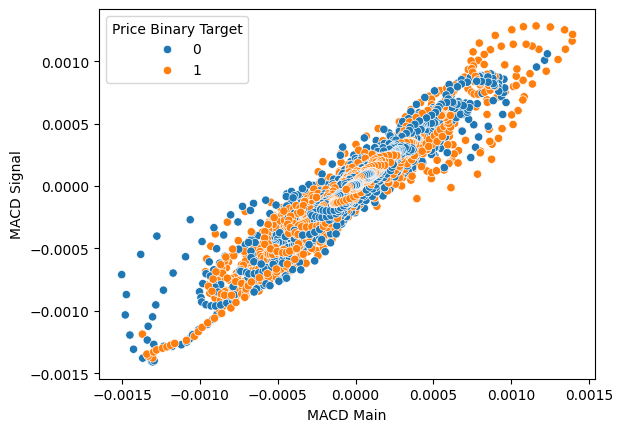

In [ ]:
sns.scatterplot(data=data,x="MACD Main",y="MACD Signal",hue="Price Binary Target")

Text(0.5, 0, 'EURUSD Close')

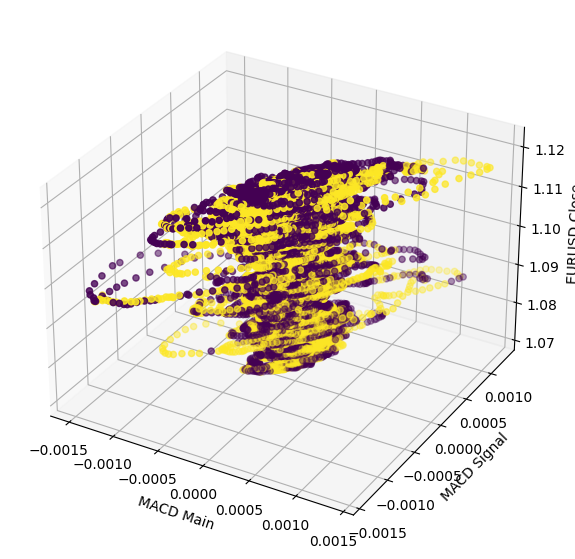

In [ ]:
#Define the 3D Plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.scatter(data["MACD Main"],data["MACD Signal"],data["Close"],c=data["Price Binary Target"])
ax.set_xlabel("MACD Main")
ax.set_ylabel("MACD Signal")
ax.set_zlabel("EURUSD Close")

<Axes: xlabel='MACD Bull', ylabel='Close'>

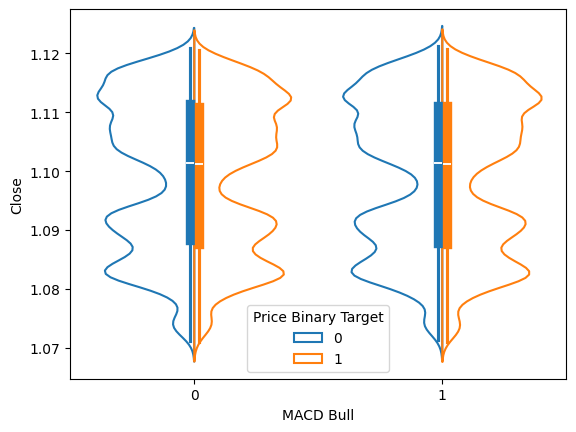

In [ ]:
sns.violinplot(data=data,x="MACD Bull",y="Close",hue="Price Binary Target",split=True,fill=False)

In [ ]:
data

Time     Open     High      Low    Close  MACD Main  \
20     2024.07.01 08:42:00  1.07596  1.07605  1.07596  1.07604   0.000103   
21     2024.07.01 08:43:00  1.07604  1.07607  1.07599  1.07602   0.000105   
22     2024.07.01 08:44:00  1.07603  1.07614  1.07603  1.07614   0.000114   
23     2024.07.01 08:45:00  1.07614  1.07615  1.07609  1.07614   0.000120   
24     2024.07.01 08:46:00  1.07614  1.07620  1.07609  1.07610   0.000120   
...                    ...      ...      ...      ...      ...        ...   
99975  2024.10.04 23:32:00  1.09748  1.09753  1.09747  1.09752  -0.000026   
99976  2024.10.04 23:33:00  1.09752  1.09752  1.09741  1.09741  -0.000039   
99977  2024.10.04 23:34:00  1.09741  1.09743  1.09738  1.09741  -0.000049   
99978  2024.10.04 23:35:00  1.09741  1.09743  1.09740  1.09743  -0.000054   
99979  2024.10.04 23:36:00  1.09743  1.09744  1.09740  1.09740  -0.000060   

        MACD Signal  Bull Bear  MACD Bull  MACD Target  Price Target  \
20     8.921551e-05          1          1     0.000040       1.07645   
21     9.277302e-05          1          1     0.000079       1.07650   
22     9.680753e-05          1          1     0.000123       1.07668   
23     1.011698e-04          1          1     0.000150       1.07661   
24     1.051186e-04          1          1     0.000178       1.07671   
...             ...        ...        ...          ...           ...   
99975 -6.308749e-07          0          0    -0.000030       1.09749   
99976 -6.123479e-06          0          0    -0.000019       1.09751   
99977 -1.292745e-05          0          0    -0.000007       1.09756   
99978 -2.014950e-05          0          0    -0.000004       1.09747   
99979 -2.743952e-05          0          0    -0.000004       1.09745   

       MACD Binary Target  Price Binary Target  
20                      0                    1  
21                      0                    1  
22                      1                    1  
23                      1                    1  
24                      1                    1  
...                   ...                  ...  
99975                   0                    0  
99976                   1                    1  
99977                   1                    1  
99978                   1                    1  
99979                   1                    1  

[99960 rows x 13 columns]

In [ ]:
#Perform train test splits
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import accuracy_score
train,test = train_test_split(data,test_size=0.5,shuffle=False)

In [ ]:
#Let's scale the data
ohlc_predictors = ["Open","High","Low","Close"]
macd_predictors = ["MACD Main","MACD Signal"]
all_predictors  = ohlc_predictors + macd_predictors
cv_predictors   = [ohlc_predictors,macd_predictors,all_predictors]

#Define the targets
cv_targets = ["MACD Binary Target","Price Binary Target","All"]

In [ ]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[all_predictors])
train_scaled = pd.DataFrame(scaler.transform(train[all_predictors]),columns=all_predictors)
test_scaled = pd.DataFrame(scaler.transform(test[all_predictors]),columns=all_predictors)

In [ ]:
#Import the models we will evaluate
from sklearn.neural_network import MLPClassifier,MLPRegressor

In [ ]:
tscv = TimeSeriesSplit(n_splits=5,gap=look_ahead)

In [ ]:
err_indexes = ["MACD Train","Price Train","All Train","MACD Test","Price Test","All Test"]

In [ ]:
#Now let us define a table to store our error levels
columns = ["Model Accuracy"]

cv_err = pd.DataFrame(columns=columns,index=err_indexes)

In [ ]:
#Reset index
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
#Initailize the model
price_model = MLPClassifier(hidden_layer_sizes=(10,6))
macd_model  = MLPClassifier(hidden_layer_sizes=(10,6))
all_model   = MLPClassifier(hidden_layer_sizes=(10,6))

price_acc = []
macd_acc = []
all_acc = []

#Cross validate each model twice
for j,(train_index,test_index) in enumerate(tscv.split(train_scaled)):
  #Fit the models
  price_model.fit(train_scaled.loc[train_index,ohlc_predictors],train.loc[train_index,"Price Binary Target"])
  macd_model.fit(train_scaled.loc[train_index,all_predictors],train.loc[train_index,"MACD Binary Target"])
  all_model.fit(train_scaled.loc[train_index,all_predictors],train.loc[train_index,"Price Binary Target"])
  #Store the accuracy
  price_acc.append(accuracy_score(train.loc[test_index,"Price Binary Target"],price_model.predict(train_scaled.loc[test_index,ohlc_predictors])))
  macd_acc.append(accuracy_score(train.loc[test_index,cv_targets[0]],macd_model.predict(train_scaled.loc[test_index,all_predictors])))
  all_acc.append(accuracy_score(train.loc[test_index,cv_targets[1]],all_model.predict(train_scaled.loc[test_index,all_predictors])))

#Now we can store our estimates of the model's error
cv_err.iloc[0,0] = np.mean(price_acc)
cv_err.iloc[1,0] = np.mean(macd_acc)
cv_err.iloc[2,0] = np.mean(all_acc)
#Estimating test error
cv_err.iloc[3,0] = accuracy_score(test[cv_targets[1]],price_model.predict(test_scaled[ohlc_predictors]))
cv_err.iloc[4,0] = accuracy_score(test[cv_targets[0]],macd_model.predict(test_scaled[all_predictors]))
cv_err.iloc[5,0] = accuracy_score(test[cv_targets[1]],all_model.predict(test_scaled[all_predictors]))




In [ ]:
cv_err

Model Accuracy
MACD Train        0.489292
Price Train       0.691957
All Train         0.496495
MACD Test         0.492377
Price Test        0.695838
All Test          0.492377

In [ ]:
#Let's tune our model further
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Reinitialize the model
model  = MLPRegressor(max_iter=500)

In [ ]:
#Define the tuner
tuner = RandomizedSearchCV(
        model,
        {
        "activation" : ["relu","logistic","tanh","identity"],
        "solver":["adam","sgd","lbfgs"],
        "alpha":[0.1,0.01,0.001,0.0001,0.00001,0.00001,0.0000001],
        "tol":[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001],
        "learning_rate":['constant','adaptive','invscaling'],
        "learning_rate_init":[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001],
        "hidden_layer_sizes":[(2,4,8,2),(10,20,40,20),(5,10),(2,20,10,2,10),(20,100,10),(1,5,10),(20,10,5,1),(2,2,2,2),(2,4,8,16,32),(10,5,1)],
        "early_stopping":[True,False],
        "warm_start":[True,False],
        "shuffle": [True,False]
        },
        n_iter=100,
        cv=5,
        n_jobs=-1,
        scoring="neg_mean_squared_error"
)

In [ ]:
tuner.fit(train.loc[:,ohlc_predictors],train.loc[:,"Price Target"])